In [23]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from functools import reduce
from sklearn.preprocessing import normalize

In [2]:
## Returns True if the arrays representing the two partitions are adjacent by a swap and false otherwise
def is_adjacent(part1, part2):
    values = set(part1)
    dist_size = len(part1) / len(values)
    parts1 = np.array(list(map(lambda v: np.ma.masked_equal(part1, v).mask, values)))
    parts2 = np.array(list(map(lambda v: np.ma.masked_equal(part2, v).mask, values)))
    
    num_diff_1 = 0
    num_diff_2 = 0
    diff_part1 = []
    diff_part2 = []
    
    is_in = lambda row, matrix: np.equal(row, parts2).all(axis=1).any()
    
    for i in range(parts1.shape[0]):
        if not np.equal(parts1[i], parts2).all(axis=1).any():
            num_diff_1 += 1
            diff_part1.append(parts1[i])
        if not np.equal(parts2[i], parts1).all(axis=1).any():
            num_diff_2 += 1
            diff_part2.append(parts2[i])
            
    if num_diff_1 != 2 and num_diff_2 != 2:
        return False
    else:
        swaps = sum(diff_part1[0] ^ diff_part2[0])
        return swaps == 2 or swaps == (dist_size*2 - 2)   

In [3]:
def adjacent_nodes(nodes):
    edges = []
    for i in nodes.keys():
        for j in nodes.keys():
            if i < j and is_adjacent(nodes[i], nodes[j]):
                edges.append((i, j))
    return edges

In [17]:
def plot_partition(part, dim=None, **kwargs):
    if not dim:
        dim = int(np.sqrt(part.shape[0]))
        dim = (dim, dim)
    plan = part.reshape(dim)
    return plt.imshow(plan, **kwargs)

## 3x3 -> 3

In [170]:
with open("enums/enum_[3,3]_[3]_3_rc.txt") as file:
    nodes={}
    for i, line in enumerate(file):
        nodes[i] = np.fromstring(line, dtype=int, sep=',')
    

In [172]:
graph = nx.Graph()
graph.add_edges_from(adjacent_nodes(nodes))

In [173]:
len(graph.edges)

16

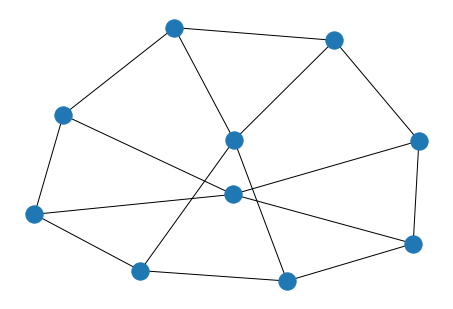

In [174]:
nx.draw(graph)

In [49]:
degrees = list(map(lambda n: nx.degree(graph,n), graph.nodes()))

In [50]:
print("Max Degree:", max(degrees))
print("Mim Degree:", min(degrees))

Max Degree: 4
Mim Degree: 3


In [91]:
nx.radius(graph)

3

In [92]:
nx.diameter(graph)

3

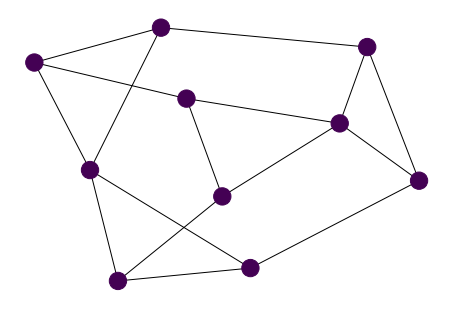

In [53]:
nx.draw(graph,
        node_color=[n in nx.center(graph) for n in graph.nodes()])

### 4x4 -> 4

In [118]:
with open("enums/enum_[4,4]_[4]_4_rc.txt") as file:
    nodes_4_4={}
    for i, line in enumerate(file):
        nodes_4_4[i] = np.fromstring(line, dtype=int, sep=',')   

In [119]:
edges_4_4 = adjacent_nodes(nodes_4_4)

In [120]:
graph_4_4 = nx.Graph()
graph_4_4.add_edges_from(edges_4_4)

In [39]:
len(graph_4_4.edges)

260

In [121]:
degrees_4_4 = list(map(lambda n: nx.degree(graph_4_4,n), graph_4_4.nodes()))

In [41]:
print("Max Degree:", max(degrees_4_4))
print("Min Degree:", min(degrees_4_4))

Max Degree: 8
Min Degree: 3


In [42]:
nx.radius(graph_4_4)

6

In [43]:
nx.diameter(graph_4_4)

8

In [44]:
len(nx.center(graph_4_4))

36

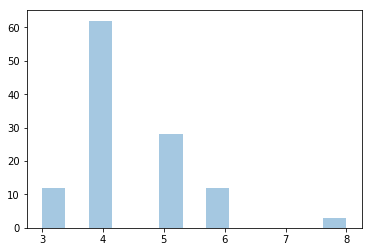

In [45]:
sns.distplot(degrees_4_4, kde=False)

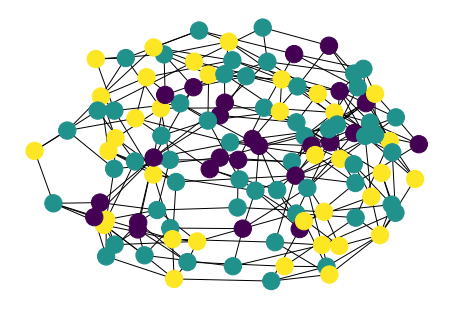

In [130]:
one_away = reduce(lambda s, n: s | set(nx.neighbors(graph_4_4,n)),center_4_4, set())
one_away = one_away - set(center_4_4)
center_4_4 = nx.center(graph_4_4)
nx.draw(graph_4_4,
        node_color=[0.5 if n in one_away else n in center_4_4 for n in graph_4_4.nodes()])

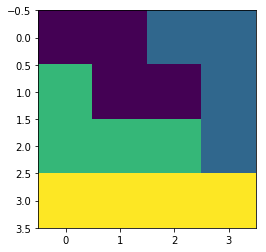

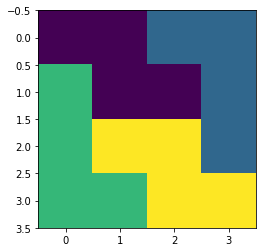

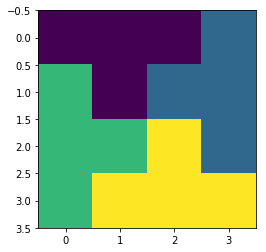

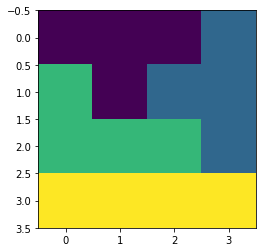

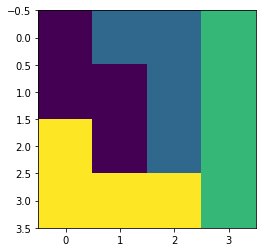

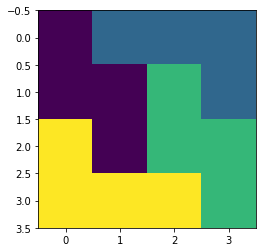

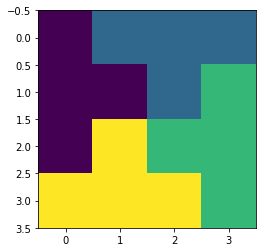

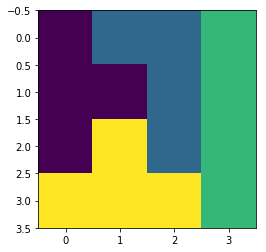

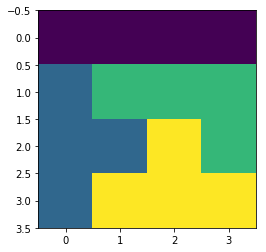

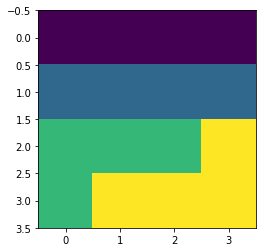

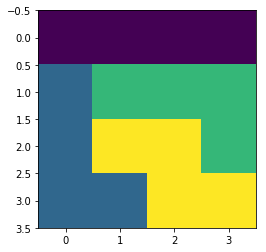

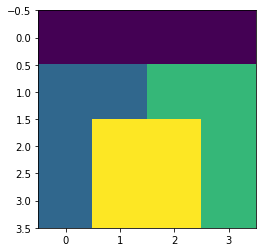

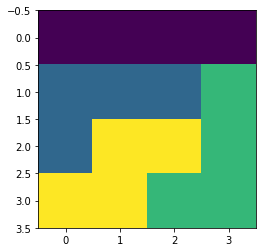

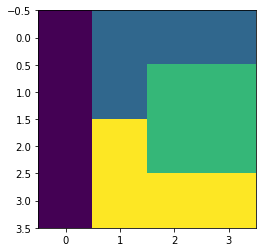

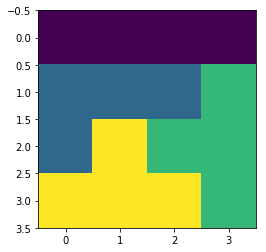

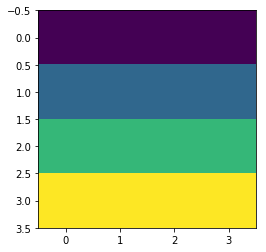

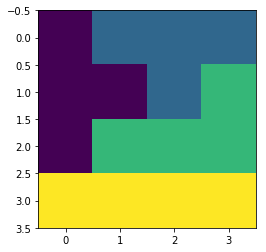

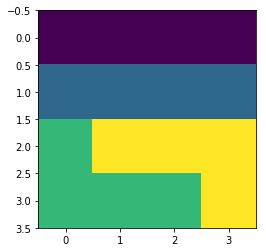

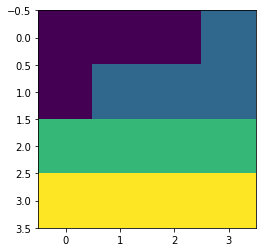

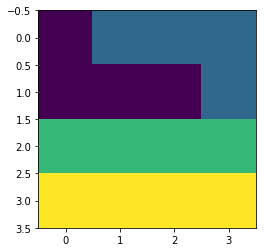

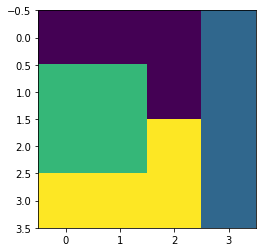

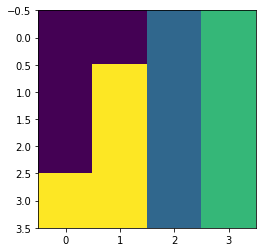

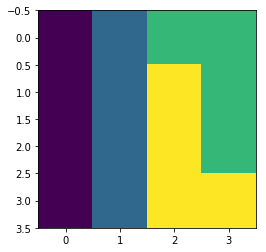

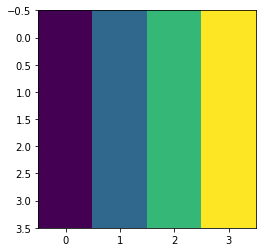

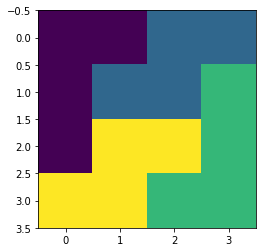

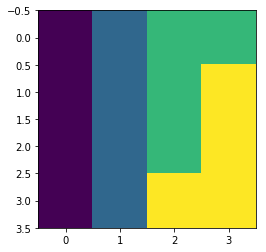

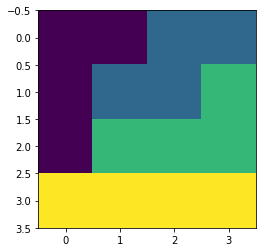

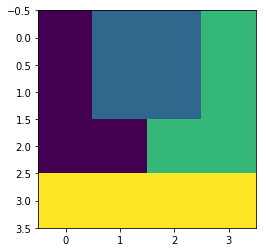

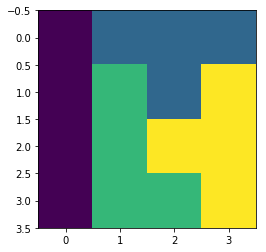

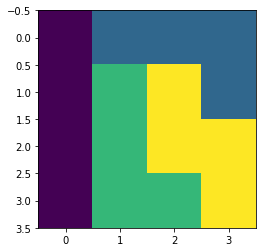

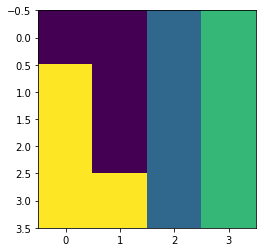

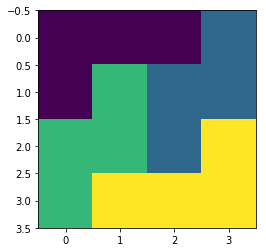

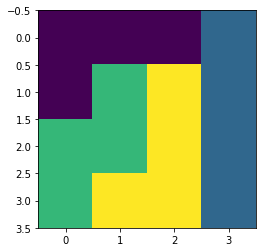

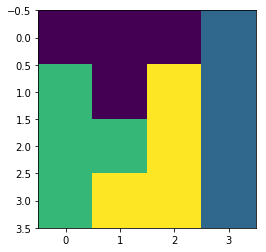

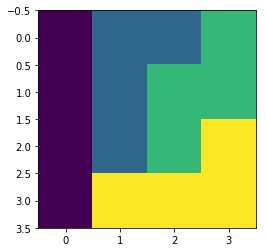

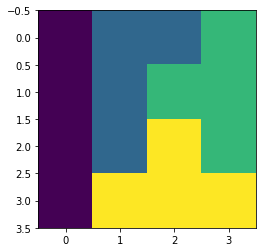

In [120]:
for node in center_4_4:
    plot_partition(nodes_4_4[node])
    plt.show()

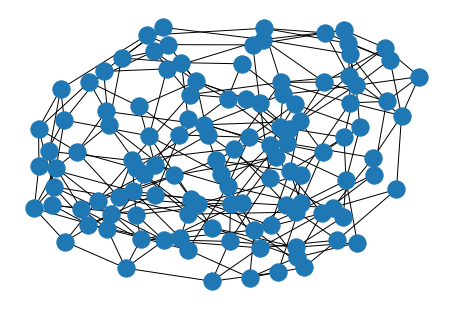

In [107]:
nx.draw(graph_4_4)

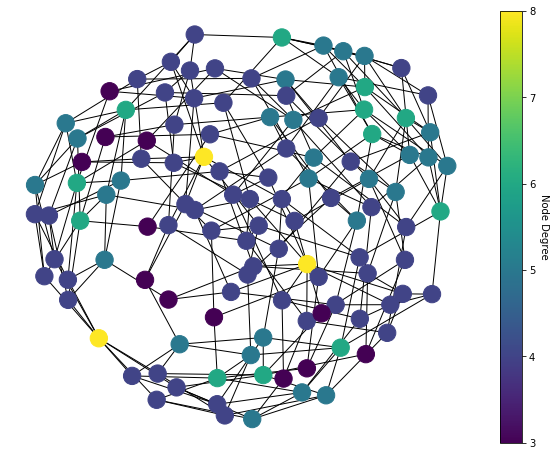

In [159]:
plt.figure(figsize=(8,6))
nx.draw_kamada_kawai(graph_4_4,
                     node_color=[nx.degree(graph_4_4,n) for n in graph_4_4.nodes()])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin = 3,vmax=8))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Node Degree", rotation=-90, va="bottom")
plt.show()

## 4x4 ->2

In [109]:
with open("enums/enum_[4,4]_[8]_2_rc.txt") as file:
    nodes_4_4_2={}
    for i, line in enumerate(file):
        nodes_4_4_2[i] = np.fromstring(line, dtype=int, sep=',')

In [110]:
edges_4_4_2 = adjacent_nodes(nodes_4_4_2)
graph_4_4_2 = nx.Graph()
graph_4_4_2.add_edges_from(edges_4_4_2)

In [111]:
print("# edges:", len(edges_4_4_2))
print("# nodes:", len(graph_4_4_2.nodes))

# edges: 328
# nodes: 70


In [112]:
degrees_4_4_2 = list(map(lambda n: nx.degree(graph_4_4_2,n), graph_4_4_2.nodes()))
print("Max Degree:", max(degrees_4_4_2))
print("Min Degree:", min(degrees_4_4_2))

Max Degree: 12
Min Degree: 7


In [113]:
print("Radius:", nx.radius(graph_4_4_2))
print("Diameter:", nx.diameter(graph_4_4_2))
print("#Centers:", len(nx.center(graph_4_4_2)))

Radius: 4
Diameter: 5
#Centers: 62


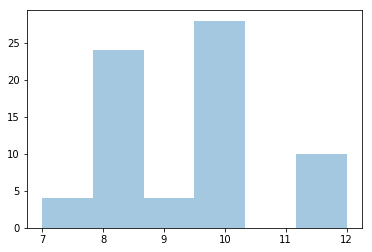

In [114]:
sns.distplot(degrees_4_4_2, kde=False)

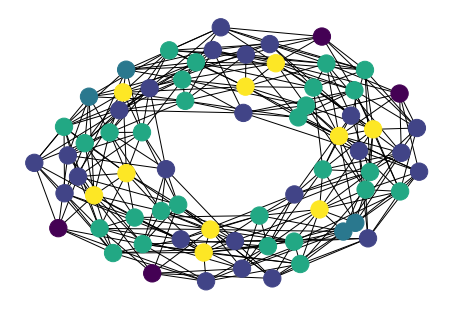

In [115]:
nx.draw_kamada_kawai(graph_4_4_2,
                     node_color=[nx.degree(graph_4_4_2,n) for n in graph_4_4_2.nodes()])

Text(0,0.5,'Distance from Center')

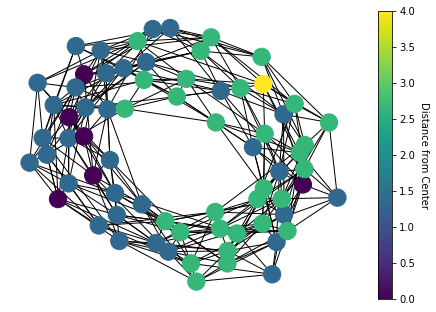

In [207]:
center_4_4_2 = nx.center(graph_4_4_2)
nx.draw(graph_4_4_2,
        node_color=[distance_from_center(graph_4_4_2, n, center_4_4_8) for n in graph_4_4_2.nodes()])

sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0,vmax=nx.radius(graph_4_4_2)))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Distance from Center", rotation=-90, va="bottom")

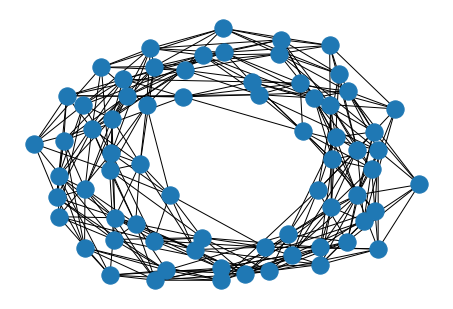

In [12]:
nx.draw(graph_4_4_2)

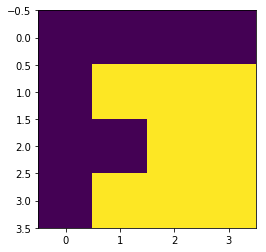

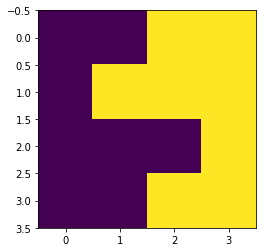

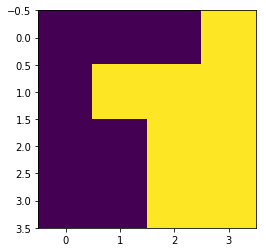

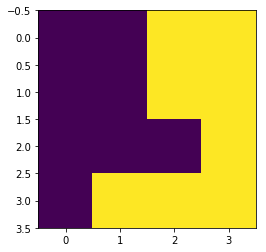

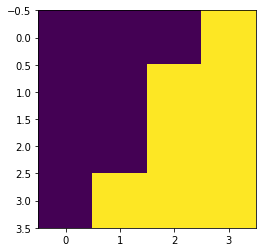

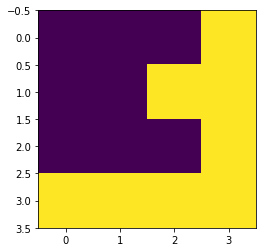

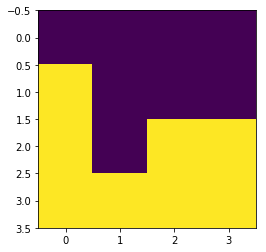

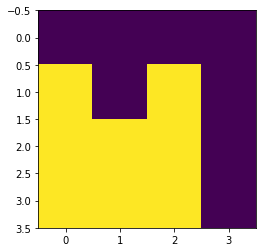

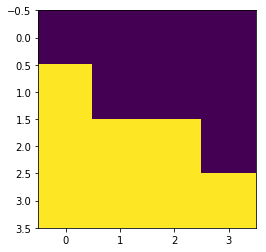

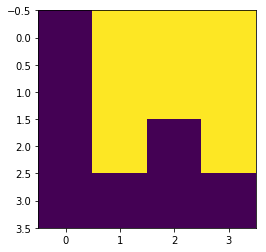

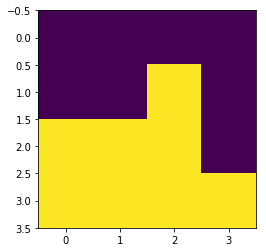

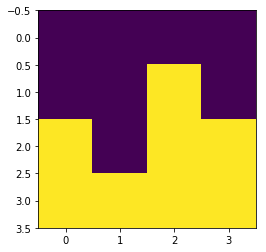

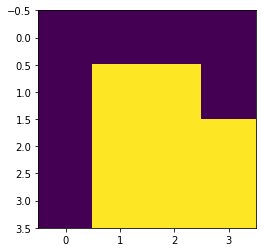

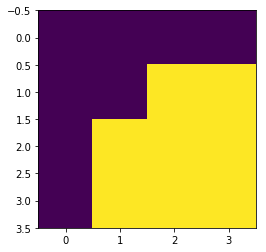

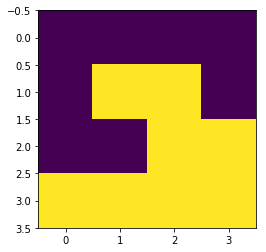

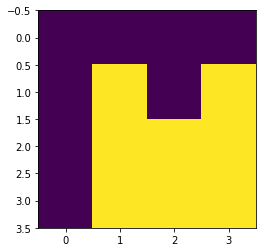

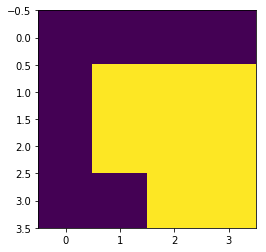

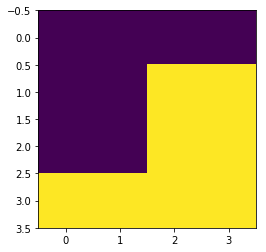

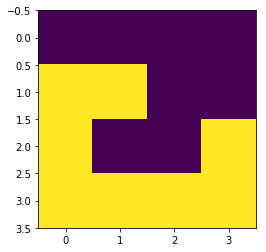

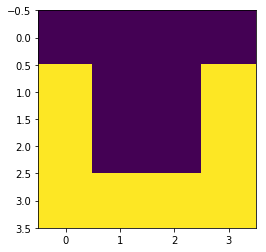

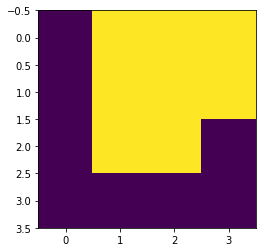

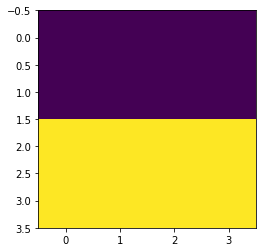

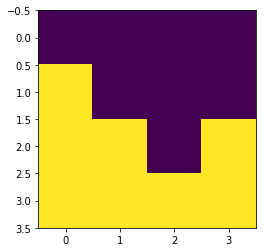

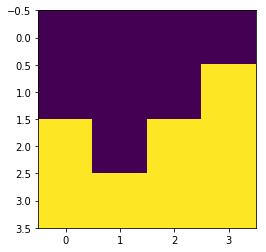

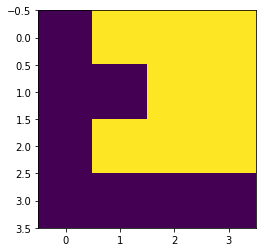

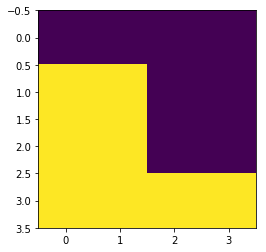

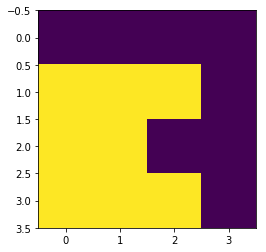

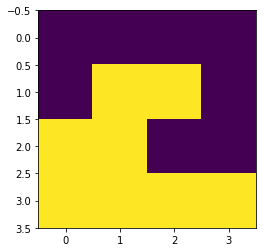

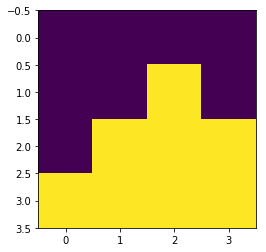

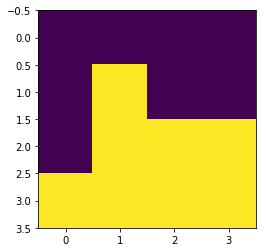

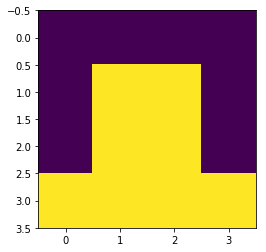

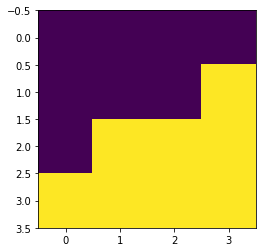

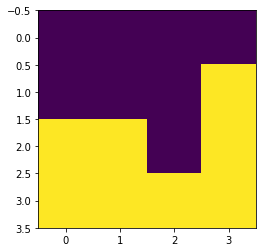

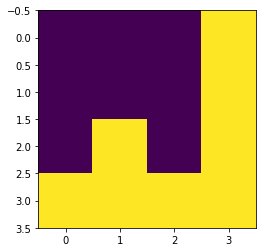

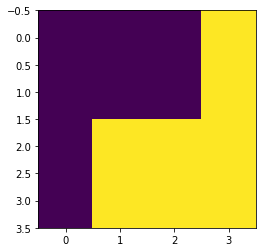

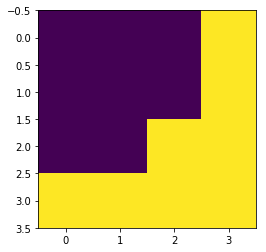

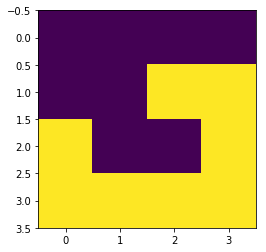

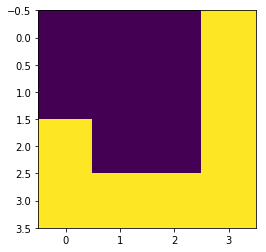

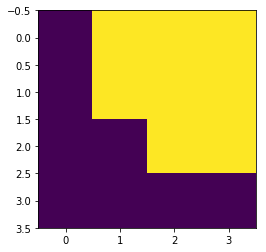

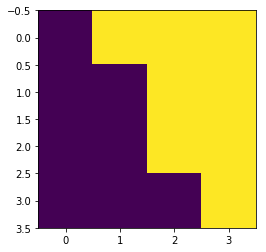

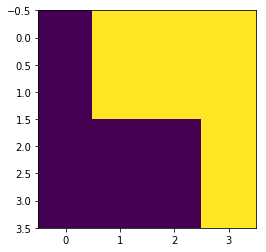

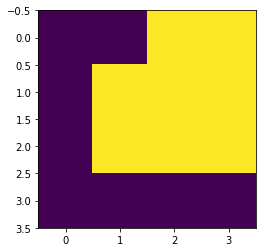

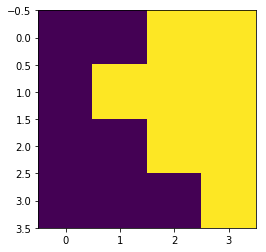

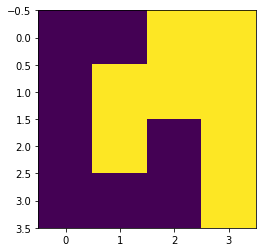

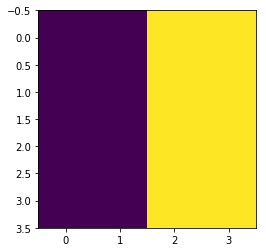

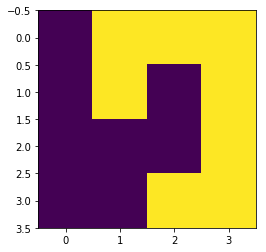

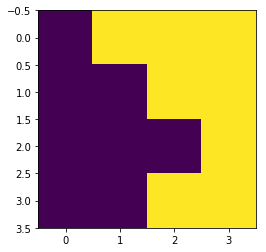

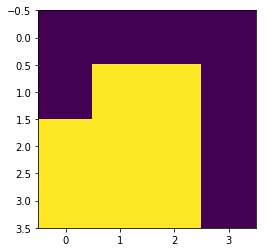

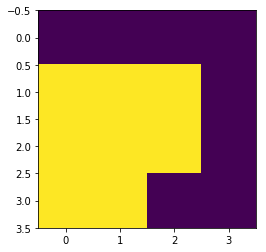

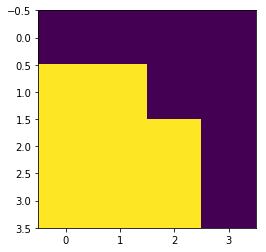

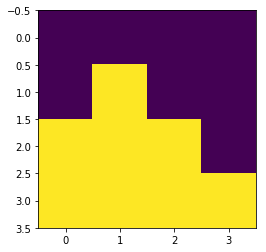

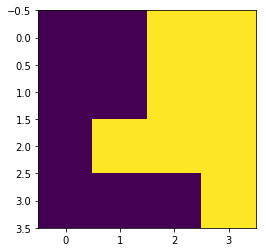

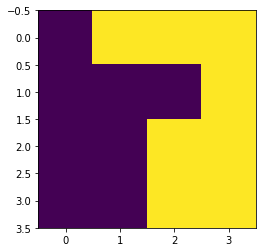

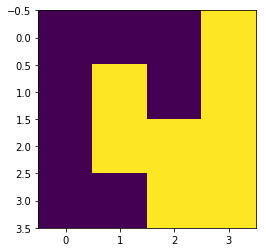

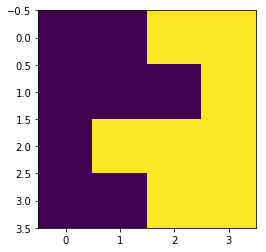

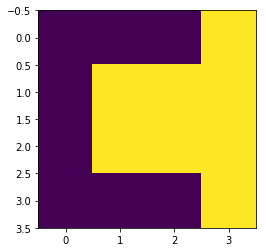

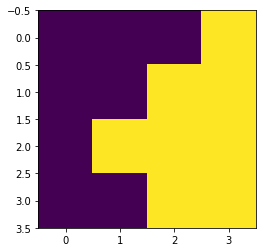

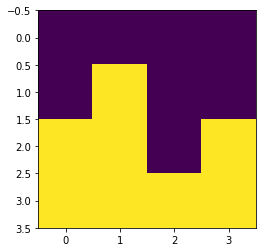

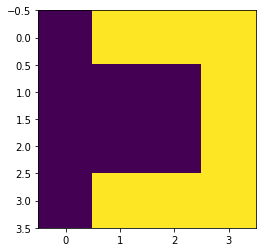

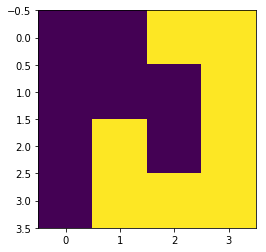

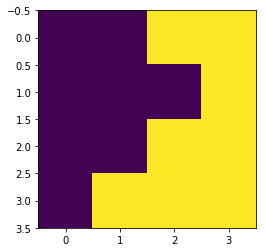

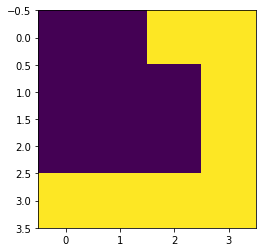

In [119]:
for node in center_4_4_2:
    plot_partition(nodes_4_4_2[node])
    plt.show()

### 4x4->8

In [64]:
with open("enums/enum_[4,4]_[2]_8_rc.txt") as file:
    nodes_4_4_8={}
    for i, line in enumerate(file):
        nodes_4_4_8[i] = np.fromstring(line, dtype=int, sep=',')

In [65]:
edges_4_4_8 = adjacent_nodes(nodes_4_4_8)
graph_4_4_8 = nx.Graph()
graph_4_4_8.add_edges_from(edges_4_4_8)

In [7]:
print("# edges:", len(edges_4_4_8))
print("# nodes:", len(graph_4_4_8.nodes))

# edges: 70
# nodes: 36


In [8]:
degrees_4_4_8 = list(map(lambda n: nx.degree(graph_4_4_8,n), graph_4_4_8.nodes()))
print("Max Degree:", max(degrees_4_4_8))
print("Min Degree:", min(degrees_4_4_8))

Max Degree: 6
Min Degree: 1


In [9]:
print("Radius:", nx.radius(graph_4_4_8))
print("Diameter:", nx.diameter(graph_4_4_8))
print("#Centers:", len(nx.center(graph_4_4_8)))

Radius: 5
Diameter: 10
#Centers: 6


In [35]:
pi_4_4_8 = normalize(np.array([degrees_4_4_8]), norm="l1")

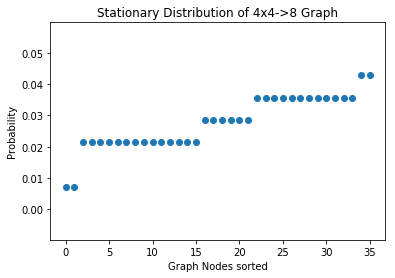

In [59]:
num_edges = len(edges_4_4_8)
plt.title("Stationary Distribution of 4x4->8 Graph")
plt.xlabel("Graph Nodes sorted")
plt.ylabel("Probability")
plt.scatter(y=sorted(pi_4_4_8.flatten()), x=sorted(graph_4_4_8.nodes()))
plt.show()

In [95]:
def symmetries(n, dim=None):
    if not dim:
        dim = int(np.sqrt(part.shape[0]))
        dim = (dim, dim)
    n.reshape(dim)
    sym_funs = [lambda n: n, lambda n: np.rot90(n),
                lambda n: np.rot90(n, k=2), lambda n: np.rot90(n, k=3),
                lambda n: np.fliplr(n), lambda n: np.fliplr(np.rot90(n)),
                lambda n: np.fliplr(np.rot90(n, k=3)), lambda n: np.fliplr(np.rot90(n, k=3))]

    return list(map(lambda f: f(n).flatten(), sym_funs))

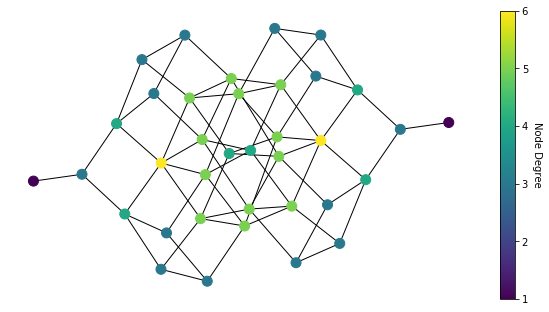

In [208]:
plt.figure(figsize=(8,4))
nx.draw_kamada_kawai(graph_4_4_8,
                     node_color=[nx.degree(graph_4_4_8,n) for n in graph_4_4_8.nodes()],
                     node_size=100)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin = 6,vmax=1))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Node Degree", rotation=-90, va="bottom")
plt.show()

In [11]:
center_4_4_8 = nx.center(graph_4_4_8)

Text(0,0.5,'Distance from Center')

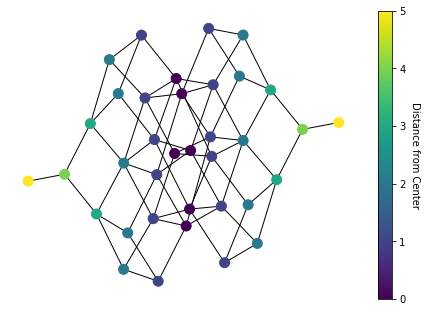

In [205]:
center_4_4_8 = nx.center(graph_4_4_8)
nx.draw_kamada_kawai(graph_4_4_8,
        node_color=[distance_from_center(graph_4_4_8, n, center_4_4_8) for n in graph_4_4_8.nodes()],
                    node_size=100)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0,vmax=nx.radius(graph_4_4_8)))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Distance from Center", rotation=-90, va="bottom")

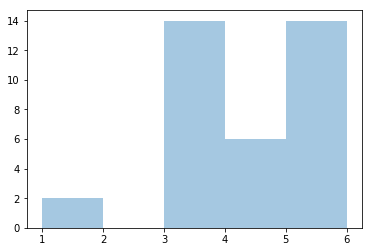

In [101]:
sns.distplot(degrees_4_4_8, kde=False)

In [159]:
# %matplotlib notebook
# n_colors = [0.5 if n in one_away else n in center_4_4_8 for n in graph_4_4_8.nodes()]
# n_colors = list(map(float, n_colors))
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.set_title('4x4->8 Graph')
# linefig = plt.figure()
# ax = fig.add_subplot(111)
# ax.set_title('click on point to plot time series')
# nx.draw(graph_4_4_8, ax=ax, node_color=n_colors, picker=5)


# def onpick(event):

#     if event.artist!=line: return True

#     N = len(event.ind)
#     if not N: return True


#     figi = plt.figure()
#     for subplotnum, dataind in enumerate(event.ind):
#         ax = figi.add_subplot(N,1,subplotnum+1)
#         plot_partition(nodes_4_4_8[dataind], ax=ax)
#         ax.text(0.05, 0.9, 'mu=%1.3f\nsigma=%1.3f'%(xs[dataind], ys[dataind]),
#                 transform=ax.transAxes, va='top')
#         ax.set_ylim(-0.5, 1.5)
#     figi.show()
#     return True

# fig.canvas.mpl_connect('pick_event', onpick)

# plt.show()

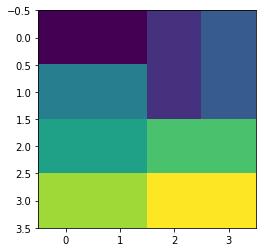

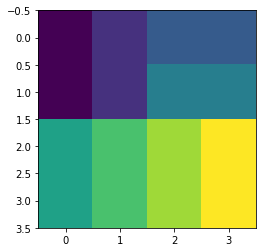

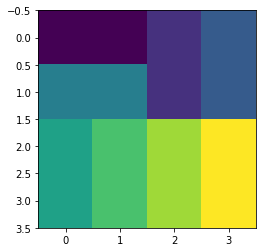

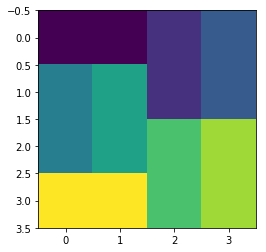

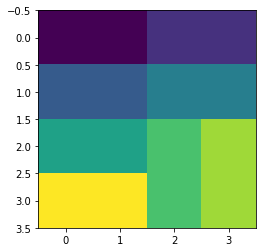

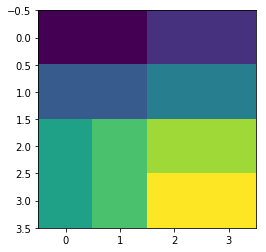

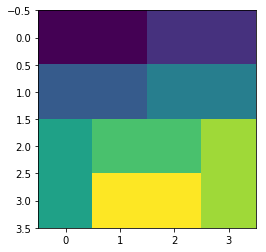

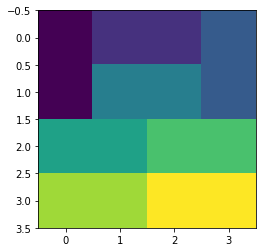

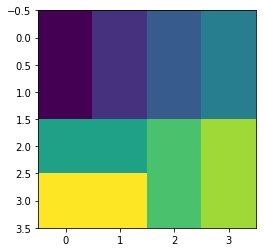

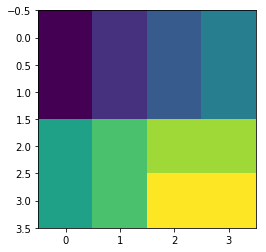

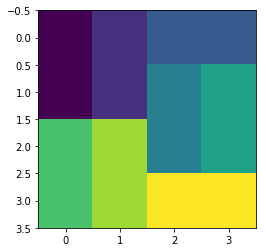

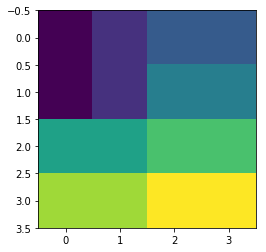

In [20]:
for node in one_away:
    plot_partition(nodes_4_4_8[node])
    plt.show()

In [94]:
nx.to_dict_of_lists(graph)

{0: [1, 2, 7],
 1: [0, 2, 5, 9],
 2: [0, 1, 3],
 7: [0, 6, 8],
 5: [1, 4, 9],
 9: [1, 5, 6],
 3: [2, 4, 8],
 4: [3, 5, 8],
 8: [3, 4, 6, 7],
 6: [7, 8, 9]}

In [183]:
center= nx.center(graph)
one_away = reduce(lambda s, n: s | set(nx.neighbors(graph,n)),center, set())
one_away = one_away - set(center)

In [190]:
def distance_from_center(graph, n, center):
    center_paths = {k:v for k, v in nx.shortest_path_length(graph, n).items() if k in center}
    return min(center_paths.values())

In [224]:
def write_json(graph, output_file="graph.json"):
    nodes_ls = []
    center = nx.center(graph)
    for node in graph.nodes():
        d = {"node": node, "neighbors": list(nx.neighbors(graph,node)),
             "partition": str(nodes[node]),
             "degree": nx.degree(graph, node), 
             "distance_from_center": distance_from_center(graph, node, center)}
        nodes_ls.append(d)

    edge_ls = []
    for (n1, n2) in graph.edges():
        edge_ls.append({"from": str(nodes[n1]), "to": str(nodes[n2])})
    
    d_graph = {"nodes": nodes_ls, "edges": edge_ls}
   
    with open(output_file, 'w') as outfile:
        json.dump(json_3_3, outfile, indent=2)

In [225]:
write_json(graph, "json_graphs_3_3_graph.json")

In [227]:
write_json(graph_4_4, "json_graphs/4_4_4_graph.json")

KeyError: 73

### 5x5->5

In [20]:
with open("enums/enum_[5,5]_[5]_5_rc.txt") as file:
    nodes_5_5={}
    for i, line in enumerate(file):
        nodes_5_5[i] = np.fromstring(line, dtype=int, sep=',')

In [21]:
edges_5_5 = adjacent_nodes(nodes_5_5)
graph_5_5 = nx.Graph()
graph_5_5.add_edges_from(edges_5_5)

KeyboardInterrupt: 

In [ ]:
print("# edges:", len(edges_5_5))
print("# nodes:", len(graph_5_5.nodes))